In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Descriptive Statistics:
             Type     Alcohol       Malic         Ash  Alca

<Figure size 1200x600 with 0 Axes>

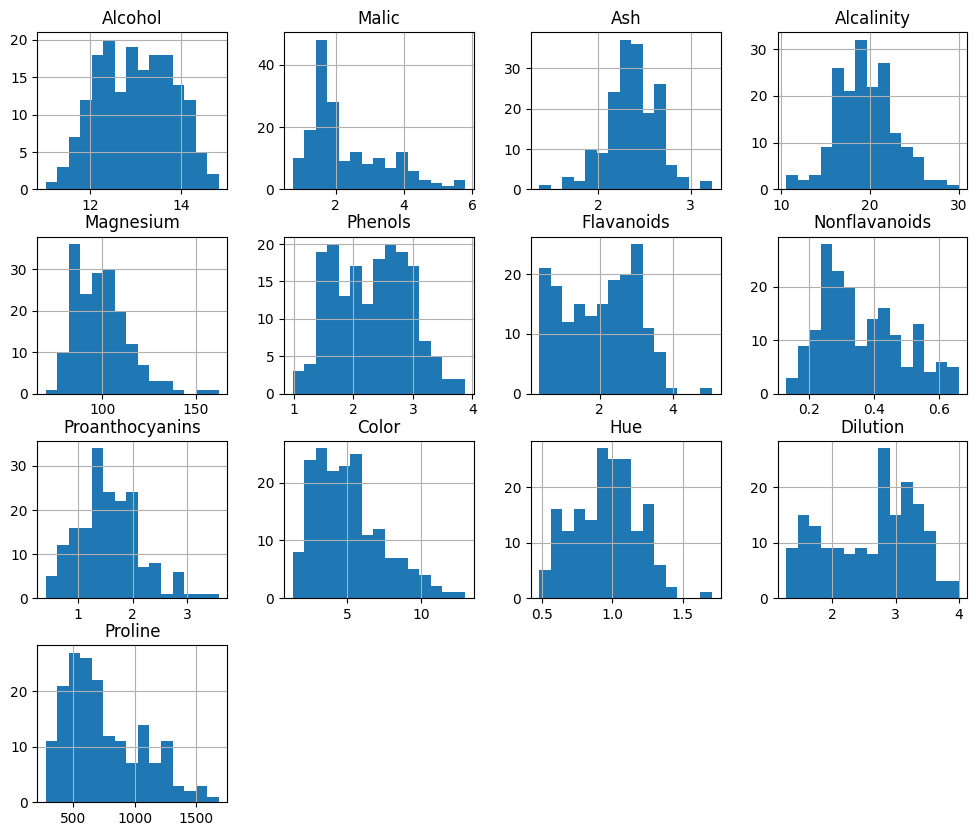

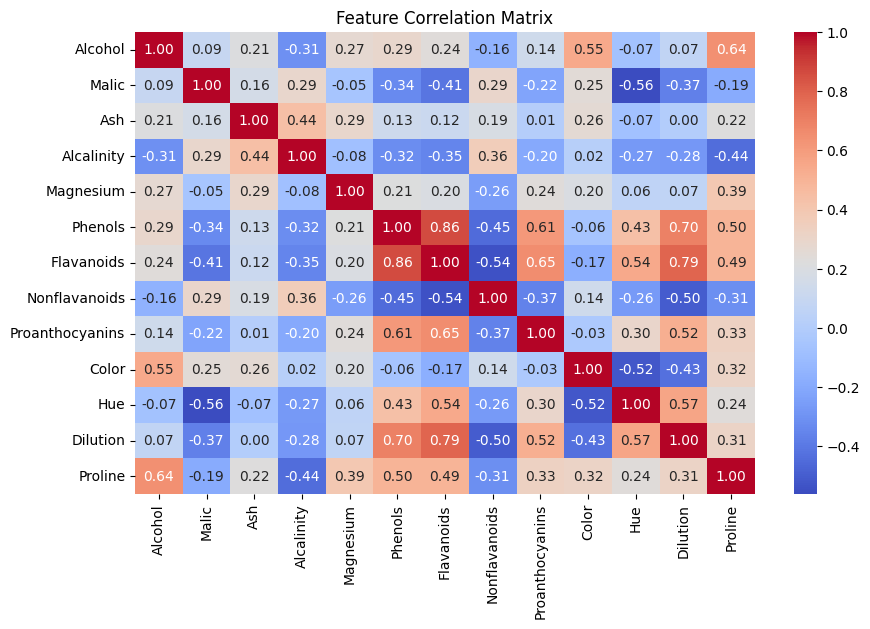

In [4]:
data = pd.read_csv("/content/sample_data/wine.csv")

# Task 1: EDA
print("Dataset Overview:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# Feature Distribution
plt.figure(figsize=(12, 6))
data.iloc[:, 1:].hist(bins=15, figsize=(12, 10))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

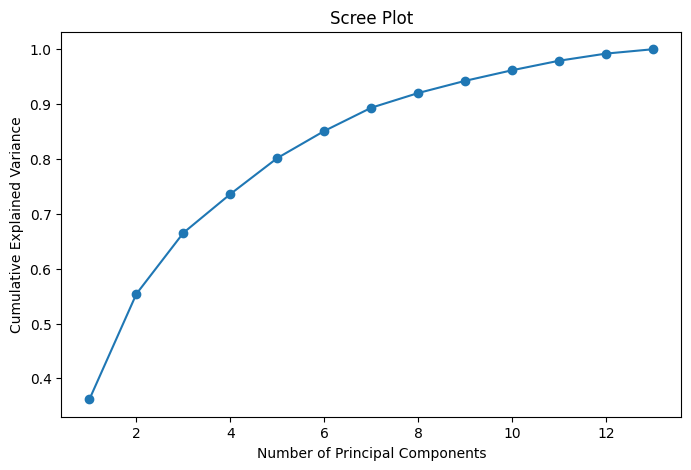

Silhouette Score (Original Data): 0.285
Silhouette Score (PCA Data): 0.560


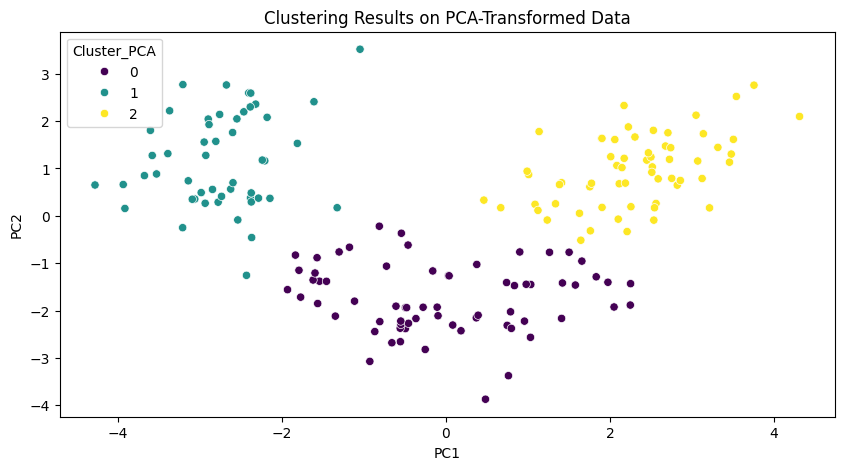


Comparison and Analysis:
- Silhouette Score (Original Data): 0.285
- Silhouette Score (PCA Data): 0.560


In [5]:
# Task 2: PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

pca = PCA()
pca.fit(data_scaled)

# Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

# Transform Data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

#K-Means Clustering on Original Data
kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(data_scaled)

data['Cluster_Original'] = labels_original
silhouette_original = silhouette_score(data_scaled, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original:.3f}")

#K-Means on PCA Data
labels_pca = kmeans.fit_predict(pca_data)
pca_df['Cluster_PCA'] = labels_pca
silhouette_pca = silhouette_score(pca_data, labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")

# Clustering Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster_PCA'], palette='viridis')
plt.title("Clustering Results on PCA-Transformed Data")
plt.show()

# Task 5: Comparison and Analysis
print("\nComparison and Analysis:")
print(f"- Silhouette Score (Original Data): {silhouette_original:.3f}")
print(f"- Silhouette Score (PCA Data): {silhouette_pca:.3f}")


###Comparison and Analysis
- PCA-transformed data has a higher silhouette score, indicating better-defined clusters.
- The original dataset may have overlapping features, making clustering less distinct.
- PCA helps reduce dimensionality while preserving variance, improving clustering performance.


###Conclusion

- PCA can enhance clustering by eliminating redundant features and reducing noise.
- When dataset dimensionality is high, PCA can improve clustering results by focusing on key variations.
- Clustering on PCA-transformed data often yields clearer clusters, as seen in the improved silhouette score.
